In [2]:
import json
import requests
from requests.structures import CaseInsensitiveDict

fields = [100, 150, 200]
energiesER = []
ERangeER = 20 #keV  # For XLZD this will change , our Bg ROI is til 10KeV
StepSizeER = 0.25 #keV
for i in list(range(int(ERangeER/StepSizeER))):
    if (i==0):
        continue
    energiesER.append(i * StepSizeER)
print(str(energiesER)) # last value 20KeV not included
energiesNR = []
ERangeNR = 100 #keV
StepSizeNR = 0.5 #keV
for i in list(range(int(ERangeNR/StepSizeNR))):
    if (i==0):
        continue
    energiesNR.append(i * StepSizeNR)

particles = ['neutron', 'beta']
jout = {}
jout["energiesER"] = energiesER
jout["energiesNR"] = energiesNR
jout["particles"] = particles
jout["fields"] = fields

for particle in particles:
    jinner = {}
    for field in fields:
        jinner2={}
        
        jinner["field"] = "field"
        lys = []
        cys = []
        energylist = []
        if particle == particles[0]:
            energylist = energiesNR
        else:
            energylist = energiesER
        for energy in energylist:
            url = "https://nest.physics.ucdavis.edu/download/calculator/process/" + particle +"/2.9/" \
                                                                                  + str(field) +"/"  \
                                                                                  + str(energy) +"/1/1"
            if (energy == 1):
                print(url)
            resp = requests.get(url)
            result = resp.json()
            photons = result['metric_m']
            electrons = result['metric_q']
            lys.append(float(photons))
            cys.append(float(electrons))
        jinner2["photons"] = lys
        jinner2["electrons"] = cys
        jinner[field] = jinner2
        jout[particle] = jinner
#json.dumps(jout, sort_keys=True, indent=4)
print(jout)
with open('nestyields.txt', 'w') as f:
    json.dump(jout, f, indent=4)

[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75, 8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 10.0, 10.25, 10.5, 10.75, 11.0, 11.25, 11.5, 11.75, 12.0, 12.25, 12.5, 12.75, 13.0, 13.25, 13.5, 13.75, 14.0, 14.25, 14.5, 14.75, 15.0, 15.25, 15.5, 15.75, 16.0, 16.25, 16.5, 16.75, 17.0, 17.25, 17.5, 17.75, 18.0, 18.25, 18.5, 18.75, 19.0, 19.25, 19.5, 19.75]
https://nest.physics.ucdavis.edu/download/calculator/process/neutron/2.9/100/1.0/1/1
https://nest.physics.ucdavis.edu/download/calculator/process/neutron/2.9/150/1.0/1/1
https://nest.physics.ucdavis.edu/download/calculator/process/neutron/2.9/200/1.0/1/1
https://nest.physics.ucdavis.edu/download/calculator/process/beta/2.9/100/1.0/1/1
https://nest.physics.ucdavis.edu/download/calculator/process/beta/2.9/150/1.0/1/1
https://nest.physics.ucdavis.edu/download/calculator/process/beta/2.9/200/1.0/1/1
{'energiesER': [0.25, 0

<class 'dict'>


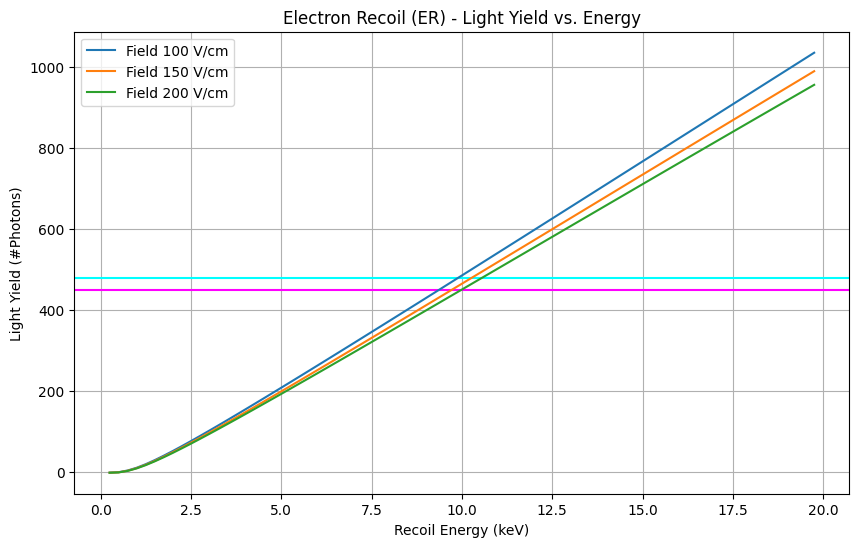

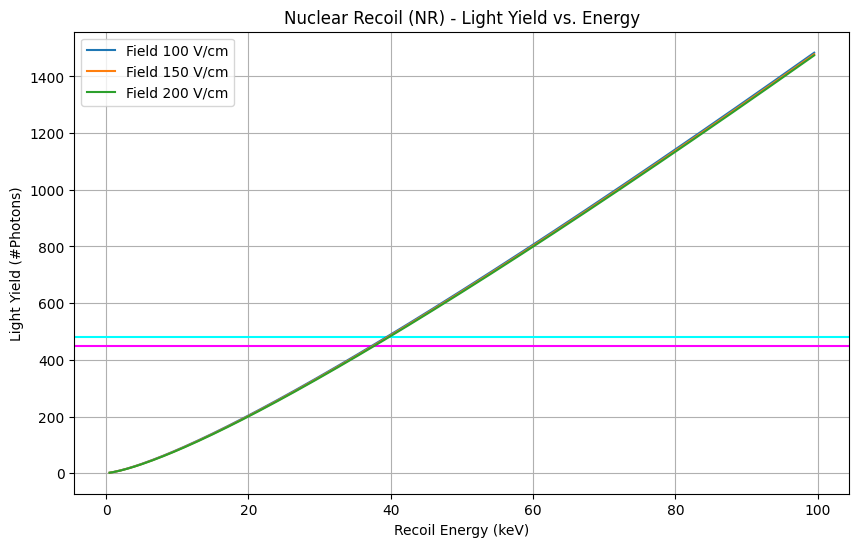

In [12]:
import json
import matplotlib.pyplot as plt

# Load the JSON data from the file
with open('nestyields.txt', 'r') as f:
    data = json.load(f)
print(type(data))
# Extract common information
fields = data["fields"]
energiesER = data["energiesER"]
energiesNR = data["energiesNR"]

# Define particle types
particles = data["particles"]

# Function to plot the data
def light_yield(data, particle, energies, title):
    plt.figure(figsize=(10, 6))
    plt.axhline(y=450,color='magenta')
    plt.axhline(y=480,color='cyan')
    # Loop over electric fields
    for field in fields:
        photons = data[particle][str(field)]["photons"]  # Light yield for the given field
        plt.plot(energies, photons, label=f'Field {field} V/cm')
    
    plt.title(title)
    plt.xlabel('Nuclear Recoil Energy (keV)')
    plt.ylabel('Light Yield (#Photons)')
    plt.legend()
    plt.grid()
    plt.show()

# Plot for Electron Recoil (ER)
light_yield(data, 'beta', energiesER, 'Electron Recoil (ER) - Light Yield vs. Energy')

# Plot for Nuclear Recoil (NR)
light_yield(data, 'neutron', energiesNR, 'Nuclear Recoil (NR) - Light Yield vs. Energy')


<class 'dict'>


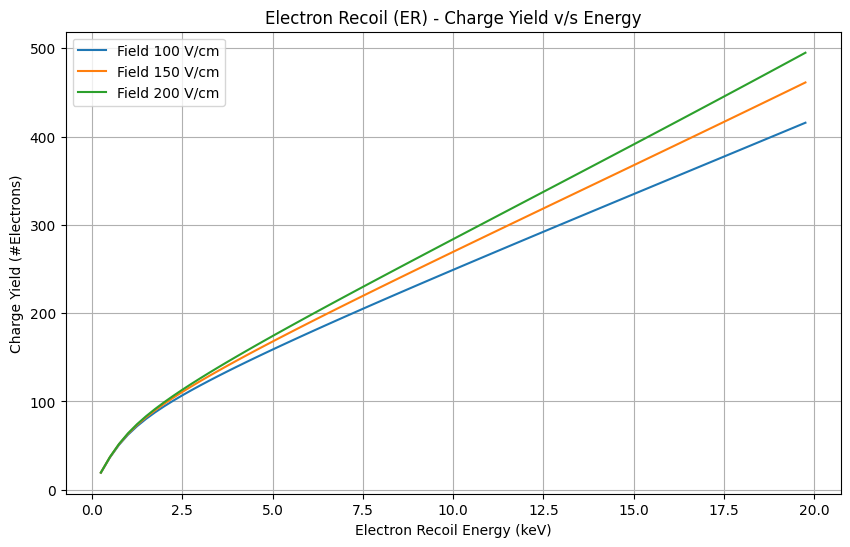

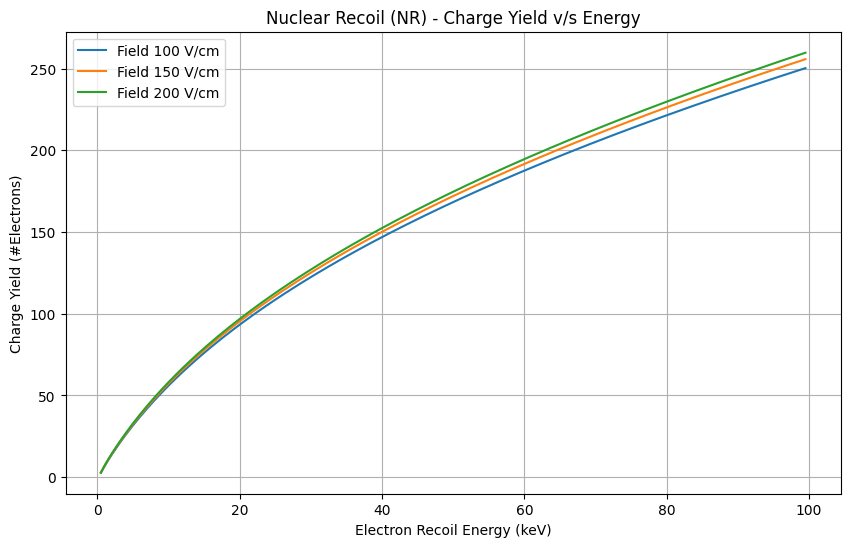

In [13]:
import json
import matplotlib.pyplot as plt

# Load the JSON data from the file
with open('nestyields.txt', 'r') as f:
    data = json.load(f)
print(type(data))
# Extract common information
fields = data["fields"]
energiesER = data["energiesER"]
energiesNR = data["energiesNR"]

# Define particle types
particles = data["particles"]

# Function to plot the data
def charge_yield(data, particle, energies, title):
    plt.figure(figsize=(10, 6))
    
    # Loop over electric fields
    for field in fields:
        electrons = data[particle][str(field)]["electrons"]  # Charge yield for the given field
        plt.plot(energies, electrons, label=f'Field {field} V/cm')
    
    plt.title(title)
    plt.xlabel('Electron Recoil Energy (keV)')
    plt.ylabel('Charge Yield (#Electrons)')
    plt.legend()
    plt.grid()
    plt.show()

# Plot for Electron Recoil (ER)
charge_yield(data, 'beta', energiesER, 'Electron Recoil (ER) - Charge Yield v/s Energy')

# Plot for Nuclear Recoil (NR)
charge_yield(data, 'neutron', energiesNR, 'Nuclear Recoil (NR) - Charge Yield v/s Energy')
